Zamierzasz kupić mieszkanie. Upatrzone M kosztuje w tym momencie 120 tys. zł, jednak przewidujesz, że przez następne 5 lat ceny mieszkań będą rosły w tempie 5% rocznie. W tym momencie nie dysponujesz wystarczającymi środkami, dlatego znajdujesz ofertę banku, który proponuje lokatę, do której dopłacasz pewna stałą kwotę na koniec każdego miesiąca. Bank oferuje nominalną stopę procentową w wysokości 12% w skali roku, przy kapitalizacji miesięcznej.

1. Ile będzie wynosiła orientacyjna cena mieszkania za 5 lat?
2. Ile musisz wpłacać do banku każdego miesiąca, aby przy przedstawionej ofercie uzbierać na mieszkanie w ciągu 5 lat?
3. Stwórz wykres przedstawiający, jak w interwałach miesięcznych zmieniać się będzie cena mieszkania (liniowy wzrost w całym okresie) oraz wartość twojej lokaty.

Do wykonania powyższego zadania wykorzystaj biblioteki NumPy, NumPy-financial oraz Matplotlib. Odpowiedzi na pytania umieść w Notebooku (jeśli korzystasz) lub w komentarzach w kodzie.

Rozwiązanie umieść w twoim repozytorium na GitHub i prześlij Mentorowi.


In [6]:
import numpy as np
import numpy_financial as npf
import matplotlib.pyplot as plt

In [7]:
k_baz = 120000
wzr_cen = 0.05
opr_lok = 0.12 /12 #oprocentowanie lokaty w skali miesięcznej
lat = 5
mies = 5 * 12
okresy = np.arange(1,mies+1,dtype=int)

In [8]:
okresy

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60])

#Zad 1

In [9]:
cena = k_baz*(1+wzr_cen)**lat
cena

153153.78750000003

####lub

In [10]:
cena2 = - np.around(npf.fv(wzr_cen, lat, 0, k_baz),2)
cena2

153153.79

#Zad 2

In [11]:
wplata = - npf.pmt(opr_lok, mies, 0, cena2)
wplata

1875.2835693994307

#Zad 3

In [12]:
c0 = k_baz
c1 = - npf.fv(wzr_cen, 1, 0, k_baz)
c2 = - npf.fv(wzr_cen, 2, 0, k_baz)
c3 = - npf.fv(wzr_cen, 3, 0, k_baz)
c4 = - npf.fv(wzr_cen, 4, 0, k_baz)
c5 = - npf.fv(wzr_cen, 5, 0, k_baz)

In [13]:
w_lok = np.ones(60)
tmp = 0
with np.nditer(w_lok, op_flags=['readwrite']) as it:
    for i in it:
        i[...] = (1+opr_lok)*tmp + wplata
        tmp = i[...]


Text(0, 0.5, 'PLN')

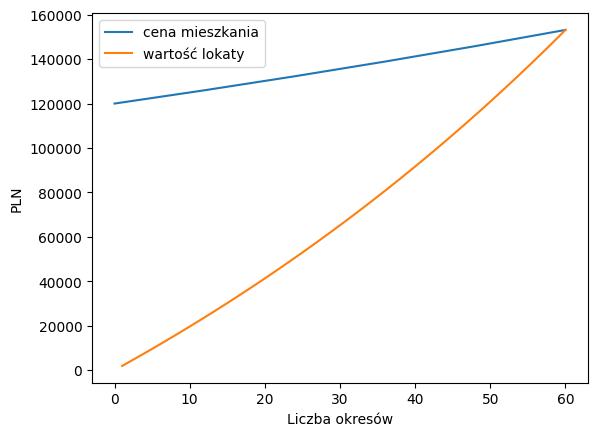

In [14]:
plt.plot([0,1*12,2*12,3*12, 4*12, 5*12],[c0,c1,c2,c3,c4,c5],label='cena mieszkania')
plt.plot(okresy,w_lok,label='wartość lokaty')
plt.legend()
plt.xlabel('Liczba okresów')
plt.ylabel('PLN')